In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

In [10]:
# CIFAR-10 데이터셋 적재 
# x_train = [50000, 32, 32, 3]  Numpy 배열
# x_test = [10000, 32, 32, 3]   Numpy 배열

# y_train과 y_test는 각 이미지의 클래스에 해당하는 0 ~ 9 사이의 정수 레이블을 가지고 있음 
# y_train = [50000, 1]
# y_test = [10000, 1]

(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

NUM_CLASSES = 10

# 신경망은 입력이 -1 ~ 1 사이 범위에 놓여 있을 때 가장 잘 동작하기 때문에 255로 나눔 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 이미지의 정수 레이블을 원핫인코딩 벡터로 바꿈 
# 어떤 이미지의 클래스 정수 레이블이 i라면 
# 원핫 인코딩은 i 번째 원소가 1이고 그 외에는 모두 길이가 10(클래스개수)인 벡터다.
# 따라서 y_train, y_test 는 [50000, 10], [10000, 10] 이다.
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [11]:
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from keras.models import Model

# 합성곱을 이용해 모델 생성 
input_layer = Input(shape = (32, 32, 3))
# (None, 32, 32, 3)

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
# (None, 32, 32, 32)
x = BatchNormalization()(x)
x = LeakyReLU()(x) 

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x) 
# (None, 16, 16, 32)
x = BatchNormalization()(x)
x = LeakyReLU()(x) 

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x) 
# (None, 16, 16, 64)
x = BatchNormalization()(x)
x = LeakyReLU()(x) 

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x) 
# (None, 8, 8, 64)
x = BatchNormalization()(x)
x = LeakyReLU()(x) 

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x) 
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [12]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 32)        0   

In [13]:
# 모델 컴파일 

from keras.optimizers import Adam 

opt = Adam(lr = 0.0005)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt, 
              metrics = ['accuracy']
              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
# 모델 훈련 
model.fit(x_train,         # 원본 이미지 데이터
          y_train,         # 원-핫 인코딩된 클래스 레이블
          batch_size = 32, 
          epochs = 10,     # 반복 훈련 횟수
          shuffle = True   # 훈련 스텝마다 배치를 훈련 데이터에서 중복을 허용하지 않고 랜덤으로 추출
          )

Epoch 1/10
1563/1563 [==============================] - 55s 5ms/step - loss: 1.8050 - accuracy: 0.3874
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1801 - accuracy: 0.5857
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0015 - accuracy: 0.6460
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9134 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8492 - accuracy: 0.7047
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7869 - accuracy: 0.7247
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7392 - accuracy: 0.7414
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7064 - accuracy: 0.7523
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6701 - accuracy: 0.7651
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.62

In [15]:
# 모델 평가
# 본적 없는 데이터에서 성능을 구하는 것 (y_test)
# 테스트세트에 대한 정확도 평가 
model.evaluate(x_test, y_test, batch_size = 1000)

313/313 [==============================] - 2s 4ms/step - loss: 0.8145 - accuracy: 0.7172


[0.8144614100456238, 0.717199981212616]

In [16]:
# predict 메서드로 테스트 세트에 대한 예측 결과 확인

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # preds = [10000, 10], 샘플마다 10개의 클래스 확률을 담은 벡터가 반환
# 확률 배열을 argmax를 사용해 하나의 예측 결과로 바꾼다. 
# axis = -1 은 마지막 차원(클래스)으로 배열을 압축하라는 뜻 -> preds_single의 크기는 [10000, 1]
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

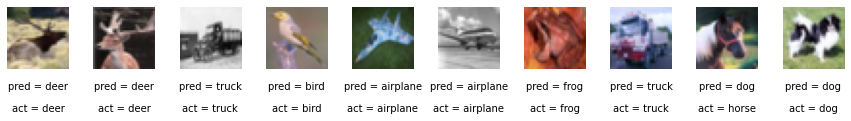

In [17]:
# 이미지의 예측값 및 실제 레이블 출력 

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
  img = x_test[idx] 
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
  ax.imshow(img)